# 1. Goal

Our primary goal is to build a Linear Regression Model to predict the Sale Price of a House based on it's Features!

# 2. Importing Libraries

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)

import warnings
warnings.filterwarnings('ignore')

# 3. Importing the Dataset

In [379]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## 3.1 Quick Eyeballing of the Overall Data

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [381]:
data.isnull().sum().sort_values(ascending = False)

Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
Sale Price                                   4
No of Bathrooms                              4
Area of the House from Basement (in Sqft)    3
Living Area after Renovation (in Sqft)       1
Longitude                                    1
Latitude                                     1
Zipcode                                      1
ID                                           0
Basement Area (in Sqft)                      0
Renovated Year                               0
Age of House (in Years)                      0
Condition of the House                       0
Overall Grade                                0
Date House was Sold                          0
No of Times Visited                          0
Waterfront View                              0
No of Floors                                 0
No of Bedrooms                               0
Lot Area after Renovation (in Sqft)          0
dtype: int64

# 4. Data Exploration

Data Exploration is important, to gain a thorough understanding of the data. We build our models on top of the data. Consequently, our model is only as good as our data.

## 4.1 Data Exploration - Target Variable (Univariate Analysis)

Our Target variable is 'Sale Price'. It represents the price at which each house was sold. It is stored as a 'float64' datatype. 

In [382]:
#summary statistics for Sale Price
pd.set_option('float_format', '{:.2f}'.format)
print(data['Sale Price'].describe())
pd.reset_option('float_format')

count     21609.00
mean     540198.44
std      367388.99
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: Sale Price, dtype: float64


#### Conclusion

1. We have 4 missing values
2. The mean value is slightly above half a million dollars
3. The median value is slightly lower than half a million dollars.

Since the Mean and Median value is not the same, we can infer that Sale Price is not normally distributed. And since the Mean is higher than Median, there is the possibility of some high value outliers.

4. The range of the Sale Price is quite high. Starting at just 75,000 Dollars and ending at 7.7 Million Dollars.

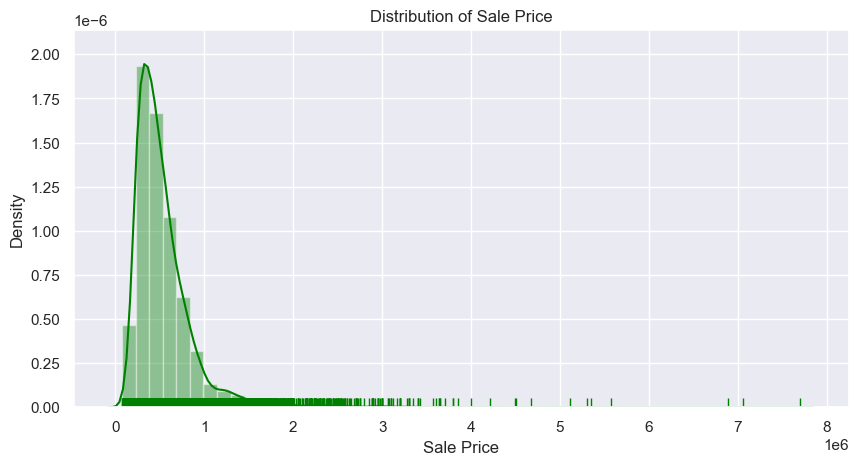

In [383]:
plt.figure(dpi = 100, figsize = (10,5))
sns.distplot(data['Sale Price'], rug = True, color = 'green')
plt.title('Distribution of Sale Price');

#### Conlusion
1. From the rug plot, it is very clear that most of the sales happen under 2 Million Dollars.
2. As hypothesized before, there seems to be a lot of high value outliers in the Sale Price variable.

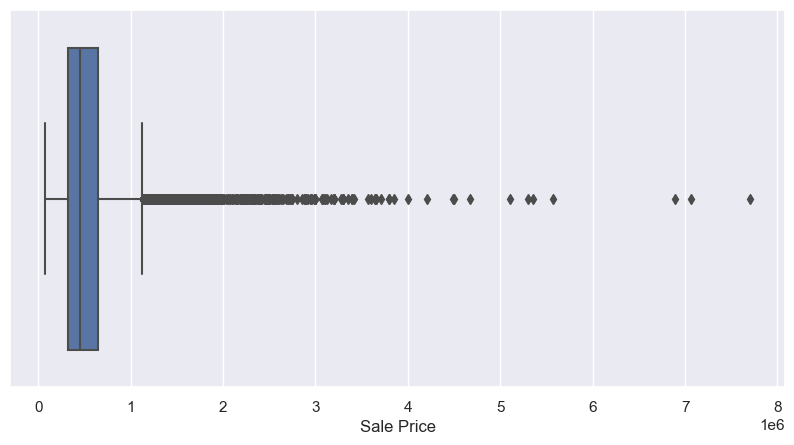

In [384]:
#visualizing outliers using box and whisker plot
plt.figure(dpi = 100, figsize = (10,5))
sns.boxplot(data['Sale Price']);

### Treating Outliers.

There are 4 different ways to treat outiers: Deletion, Imputation, Data Transformation & Binning.

We will use the imputation method to replace outlier values with limit values.

In [385]:
q = data['Sale Price'].quantile([0.25, 0.75])

q[0.25], q[0.75]

(321950.0, 645000.0)

In [386]:
iqr = q[0.75] - q[0.25] #Inter-Quartile Range = Q3-Q1
iqr

323050.0

In [387]:
lower_limit = q[0.25] - 1.5*iqr
upper_limit = q[0.75] + 1.5*iqr

lower_limit, upper_limit

(-162625.0, 1129575.0)

The calculated lower_limit is lower than the lowest(minimum) value of Sale Price in the dataset. Let's assign the minimum value for Sale Price to lower_limit.

In [388]:
lower_limit = np.min(data['Sale Price'])

In [389]:
lower_limit, upper_limit

(75000.0, 1129575.0)

In [390]:
#defining function to replace outliers with limit values
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [391]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [392]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

#### Conclusion
1. Outlier values have been removed
2. While the Mean value has reduced, it is still greater than Median Value. This indicates a right skewed distribution for Sale Price


### Treating Missing Values

There are two ways to treat missing values:
1. Deletion
2. Imputation

Since we are trying to treat the missing values for our Target Variable: Sale Price, we cannot use Imputation. We do not want our Model to learn from imputed values in the Target Variable.

We will use Deletion method to remove records with Missing Values for the Target Variable

In [393]:
data.dropna(subset = ['Sale Price'], axis = 0, inplace = True)
data['Sale Price'].isnull().sum()

0

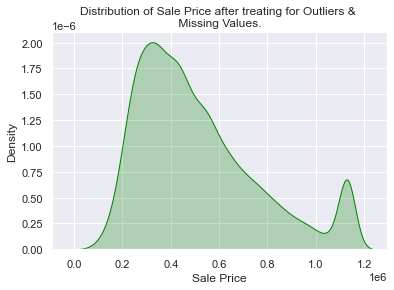

In [394]:
sns.kdeplot(data['Sale Price'], shade = True, color = 'green')
plt.title("Distribution of Sale Price after treating for Outliers & \n Missing Values. ");

#### Conclusion

1. As we had inferred before, the distribution of Sale Price is right skewed.
2. The smaller peak in the distribution of Sale Price is due to the Imputation we performed using limit values.

## Data Exploration - Independent Numerical Variables

Our Independent Variables are either numerical or categorical variables. First we will explore the Numerical Independent Variables.

In [395]:
numerical_cols = [col for col in data.columns if (data[col].dtype in ['int64', 'float64']) & (data[col].isnull().sum() > 0) ]
numerical_cols.remove('Zipcode') #Strategy for imputing zipcode is different
print(numerical_cols)

['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']


### Treating Missing Values.

For Independent Numerical variables, we will use the Imputation method to treat for missing values.

In [396]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') #an instance of the SimpleImputer Class

data[numerical_cols] = imputer.fit_transform(data[numerical_cols]) #performing the Imputation

data[numerical_cols].isnull().sum() #validating changes

No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
Area of the House from Basement (in Sqft)    0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
dtype: int64

In [397]:
#Imputing the "Zipcode" variable with the 'most_frequent' strategy
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent') #

data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1)) # performing the imputation

data['Zipcode'].isnull().sum() #validating

0

### Variable Transformation

#### 1. The 'Zipcode' Variable: Converting it into a Nominal Categorical Variable

The 'Zipcode' variable in this dataset is stored as an integer. This is not the best way to store this variable. While the variable does contain numerical data, a Zipcode is never a quantitative variable. It is a qualitative variable and best way to represent it for our analysis is as an object or as a Nominal Categorical Variable

In [398]:
data['Zipcode'] = data['Zipcode'].astype('object')

#### 2. Binning the Zipcode Variable


In [399]:
zip_table = data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values(by = 'Sale Price', ascending = True)
zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [400]:
#creating 10 bins 
zip_table['zipcode_group'] = pd.cut(zip_table['Sale Price'], bins = 10, labels = ['zipcode_group_0', 'zipcode_group_1',
                                              'zipcode_group_2', 'zipcode_group_3',
                                              'zipcode_group_4', 'zipcode_group_5',
                                              'zipcode_group_6', 'zipcode_group_7',
                                              'zipcode_group_8', 'zipcode_group_9'],
                                    include_lowest = True)
zip_table.drop(columns = ['Sale Price'], inplace = True)
zip_table.head()

,zipcode_group
Zipcode,
98002.0,zipcode_group_0
98168.0,zipcode_group_0
98032.0,zipcode_group_0
98001.0,zipcode_group_0
98148.0,zipcode_group_0


In [401]:
#merging the two dataframes
data = pd.merge(data, zip_table, left_on ='Zipcode', how = 'left', right_index = True)
data.drop(columns = ['Zipcode'], inplace = True)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),zipcode_group
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,47.5112,-122.257,1340.0,5650,zipcode_group_0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,47.7210,-122.319,1690.0,7639,zipcode_group_2
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,47.7379,-122.233,2720.0,8062,zipcode_group_2
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,47.5208,-122.393,1360.0,5000,zipcode_group_3
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,47.6168,-122.045,1800.0,7503,zipcode_group_4


#### 4. The 'No of Times Visited' Variable

In [402]:
data['No of Times Visited'].value_counts()

None      19485
Twice       963
Thrice      510
Once        332
Four        319
Name: No of Times Visited, dtype: int64

As you can see the 'No of Times Visited' variable is storing numerical information, but as strings. It would be better represented as numerical values.

In [403]:
mapping = {'None': 0,
           'Once': 1,
           'Twice': 2,
           'Thrice': 3,
           'Four': 4} # creating a mapping dictionary

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)
data['No of Times Visited'].value_counts() #validating changes

0    19485
2      963
3      510
1      332
4      319
Name: No of Times Visited, dtype: int64

### Variable Transformation - Creating 2 new Variables

#### 4. The 'Ever Renovated' Variable

This variable will take 1 of 2 values: 'Yes' if a building was renovated and 'No' if a building was never renovated. We will derive this variable from the 'Renovated Year' variable. 

In [404]:
data['Renovated Year'].head()

0       0
1    1991
2       0
3       0
4       0
Name: Renovated Year, dtype: int64

In [405]:
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes') #creating the new derived variable
data['Ever Renovated'].value_counts() #validating changes

No     20695
Yes      914
Name: Ever Renovated, dtype: int64

#### 5. The 'Year Since Renovation' Variable

This variable will take on an integer value and will tell us how many year it has been since a building has been renovated (if it has been renovated i.e). We will derive this variable from 3 other variables: 'Ever Renovated', 'Purchase Year' & 'Renovated Year'

Note: First, we will have to create the 'Purchase Year' Variable from the 'Date House was Sold' variable.

In [406]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [407]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year
data['Purchase Year'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Purchase Year, dtype: int64

In [408]:
data[['Ever Renovated', 'Renovated Year', 'Purchase Year']].head()

,Ever Renovated,Renovated Year,Purchase Year
0,No,0,2017
1,Yes,1991,2017
2,No,0,2016
3,No,0,2017
4,No,0,2016


In [409]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                         abs(data['Purchase Year']-data['Renovated Year']), 0)
data['Years Since Renovation'].head()

0     0
1    26
2     0
3     0
4     0
Name: Years Since Renovation, dtype: int64

Now our model can use these variables: 'Ever Renovated' and 'Year Since Renovation' in conjunction to figure out whether a house has been renovated and if so, then to find out how long has it been, since the renovation. This is bound to improve the accuracy of our final model. 

In [410]:
#dropping redundant columns
data.drop(columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [411]:
data.drop(columns = 'ID', inplace = True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),zipcode_group,Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,zipcode_group_0,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,zipcode_group_2,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,47.7379,-122.233,2720.0,8062,zipcode_group_2,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,zipcode_group_3,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,zipcode_group_4,No,0


### Variable Transformation -  Encoding

#### 6. Variable Transformation - One Hot Encoding of the Zipcode Variable

In [412]:
data = pd.get_dummies(data, columns = ['zipcode_group'], drop_first = True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,...,Years Since Renovation,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,...,26,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,...,0,0,0,0,1,0,0,0,0,0


#### 7. Variable Transformation - Ordinal/Label Encoding of : 'Waterfront View', 'Condition of the House' and 'Ever Renovated'

In [413]:
data["Waterfront View"] = data["Waterfront View"].map({'No':0,'Yes':1})


data['Condition of the House'] = data['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5})

data['Ever Renovated'] = data['Ever Renovated'].map({'No':0,'Yes':1})

data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,...,Years Since Renovation,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,...,26,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,...,0,0,0,0,1,0,0,0,0,0


### Separating Independent Variables and Target Variable

In [414]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

### Variable Transformation - Removing Skew

#### Distribution of Independent Numerical Variables

In [415]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [416]:
X[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             21609 non-null  int64  
 1   No of Bathrooms                            21609 non-null  float64
 2   Lot Area (in Sqft)                         21609 non-null  float64
 3   No of Floors                               21609 non-null  float64
 4   Area of the House from Basement (in Sqft)  21609 non-null  float64
 5   Basement Area (in Sqft)                    21609 non-null  int64  
 6   Age of House (in Years)                    21609 non-null  int64  
 7   Latitude                                   21609 non-null  float64
 8   Longitude                                  21609 non-null  float64
 9   Living Area after Renovation (in Sqft)     21609 non-null  float64
 10  Lot Area after Renovat

In [417]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (30,25),dpi = 120)
  plt.tight_layout()
  for j,i in enumerate(var):
    plt.subplot(len(var)/2,len(var)/2,j+1)
    plt.hist(data[i])
    plt.title(i)

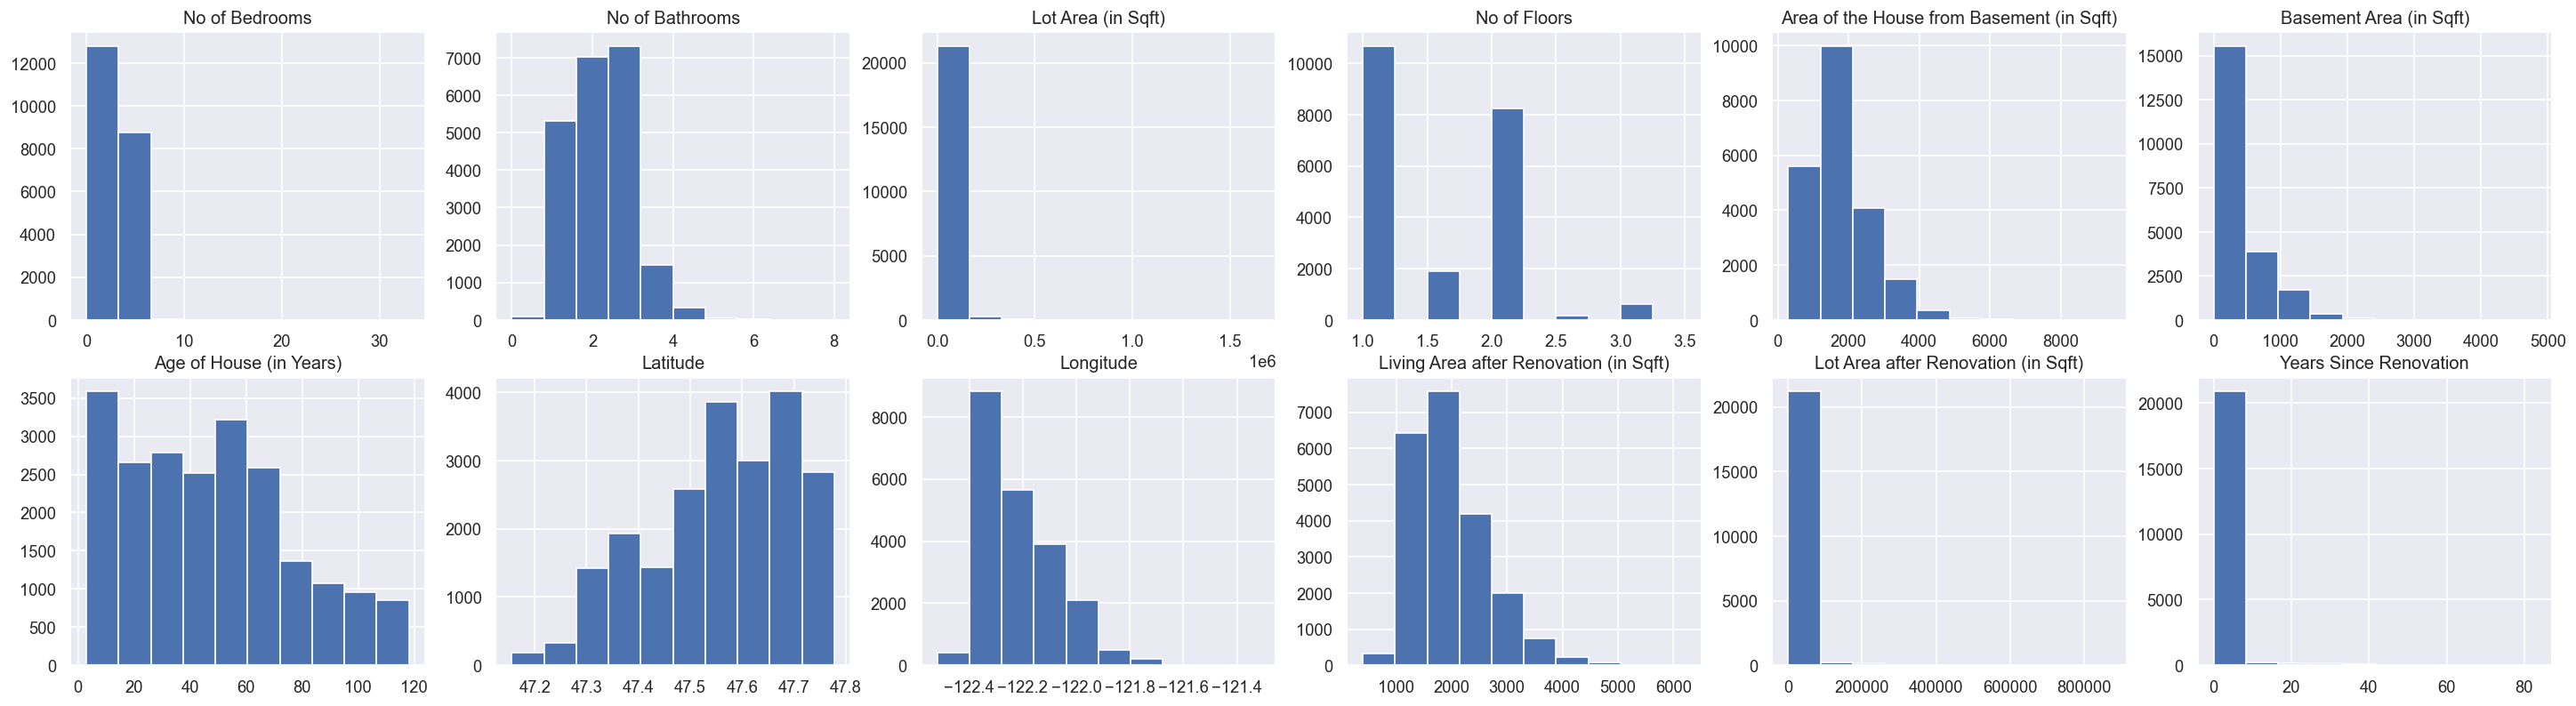

In [418]:
distribution(X, numerical_columns)

#### 8. Removing right skew of the following numerical variables

In [419]:
right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [420]:
#defining a function to removie right-skew from a variable
def remove_rightskew(x):
    return np.log(abs(x+500))

In [421]:
for i in right_skew_variables:
    X[i] = X[i].map(remove_rightskew)
    
X = X.replace(np.inf, np.nan)
X.dropna(inplace = True)

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Years Since Renovation,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,3,7,7.426549,...,6.214608,0,0,0,0,0,0,0,0,0
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,0,3,7,7.889834,...,6.265301,0,1,0,0,0,0,0,0,0
2,6.218600,6.216606,770.0,9.259131,6.216606,0,0,3,6,7.146772,...,6.214608,0,1,0,0,0,0,0,0,0
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,5,7,7.346010,...,6.214608,0,0,1,0,0,0,0,0,0
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,3,8,7.687080,...,6.214608,0,0,0,1,0,0,0,0,0


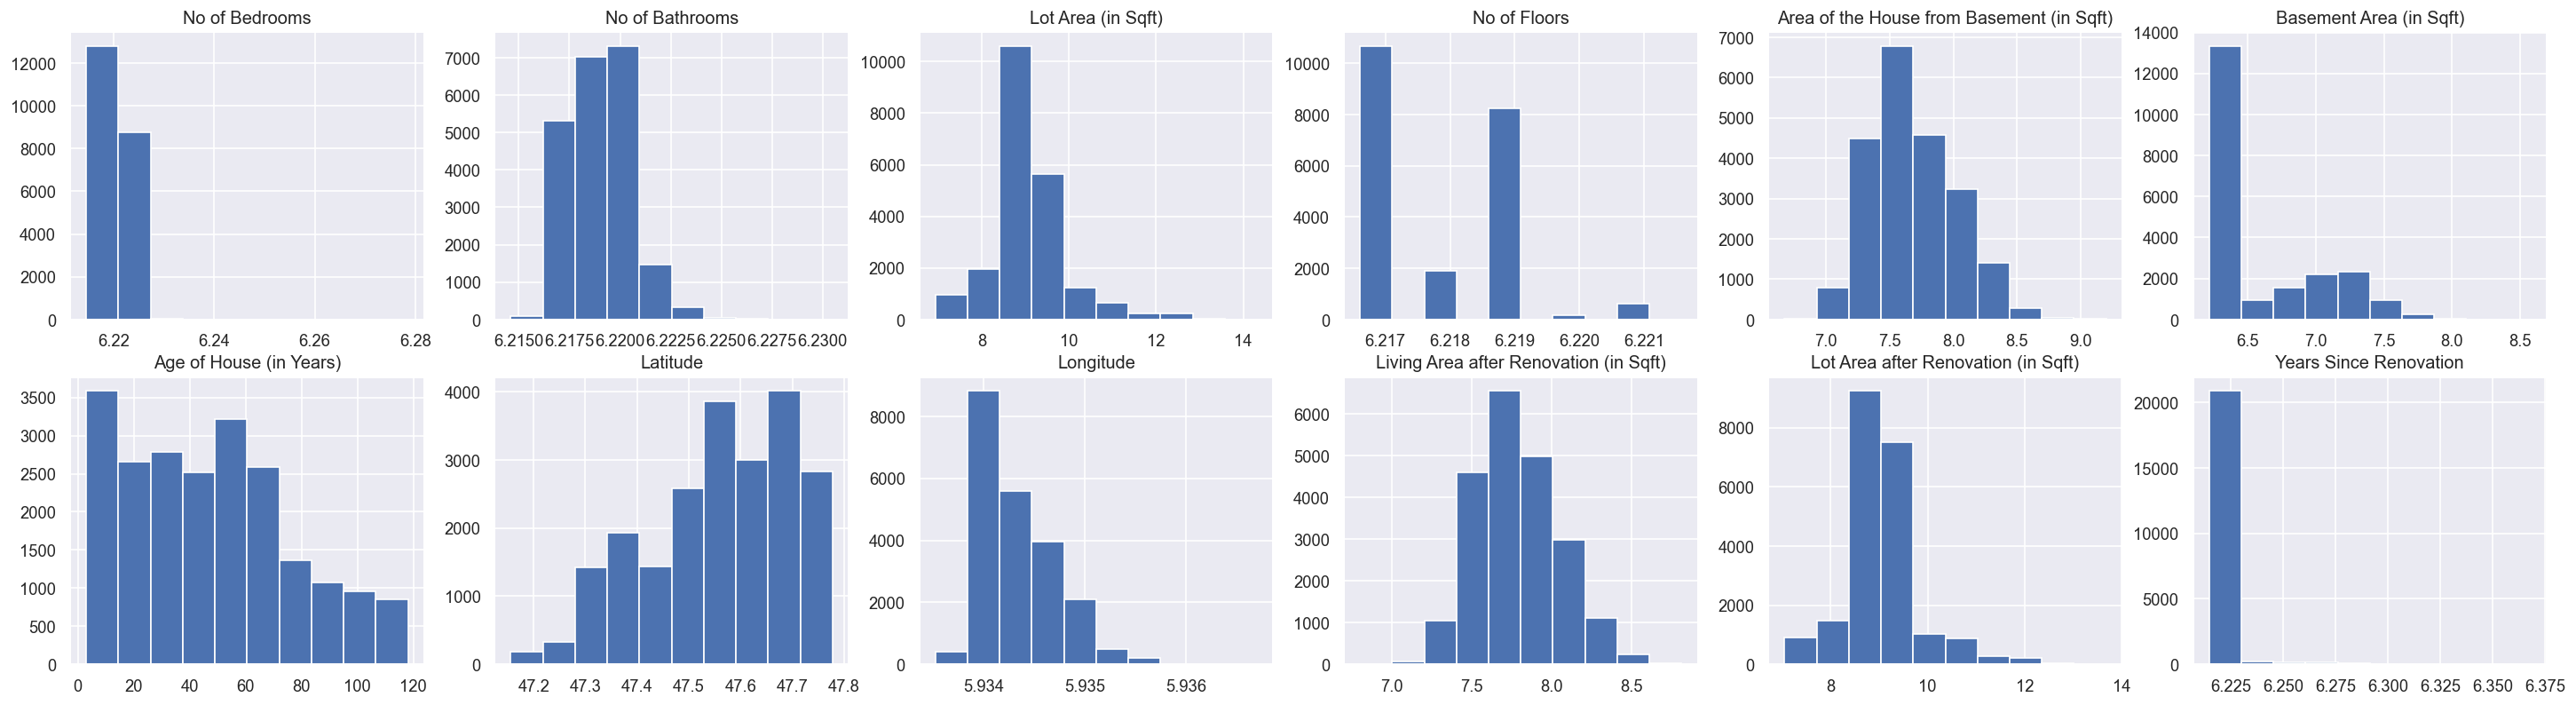

In [422]:
distribution(X, numerical_columns)

# Scaling the Dataset

In [432]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Years Since Renovation,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.767588,...,-0.168911,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.642025,...,4.827106,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-1.618851,...,-0.168911,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,-1.012639,...,-0.168911,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,0.025117,...,-0.168911,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Checking and Removing Multicollinearity

## Correlation between Independent Variables and Target Variable

In [423]:
data.corr()['Sale Price'].sort_values(ascending = False)

Sale Price                                   1.000000
Flat Area (in Sqft)                          0.695170
Overall Grade                                0.680914
Living Area after Renovation (in Sqft)       0.629944
Area of the House from Basement (in Sqft)    0.606527
No of Bathrooms                              0.535124
Latitude                                     0.402430
No of Times Visited                          0.356114
No of Bedrooms                               0.339407
zipcode_group_zipcode_group_8                0.313076
Basement Area (in Sqft)                      0.307513
No of Floors                                 0.298913
zipcode_group_zipcode_group_6                0.298646
zipcode_group_zipcode_group_4                0.212935
zipcode_group_zipcode_group_5                0.176705
zipcode_group_zipcode_group_7                0.165760
Waterfront View                              0.155894
Ever Renovated                               0.121617
zipcode_group_zipcode_group_

'Flat Area (in Sqft)', 'Overall Grade', 'Living Area after Renovation (in Sqft)', 'Area of the House from Basement (in Sqft)'and the 'No of Bathrooms' are the 5 independent variables showing high correlation(positive) i.e above 0.5 with the Target Variable 'Sale Price'.

## Correlation amongst the Independent Variables

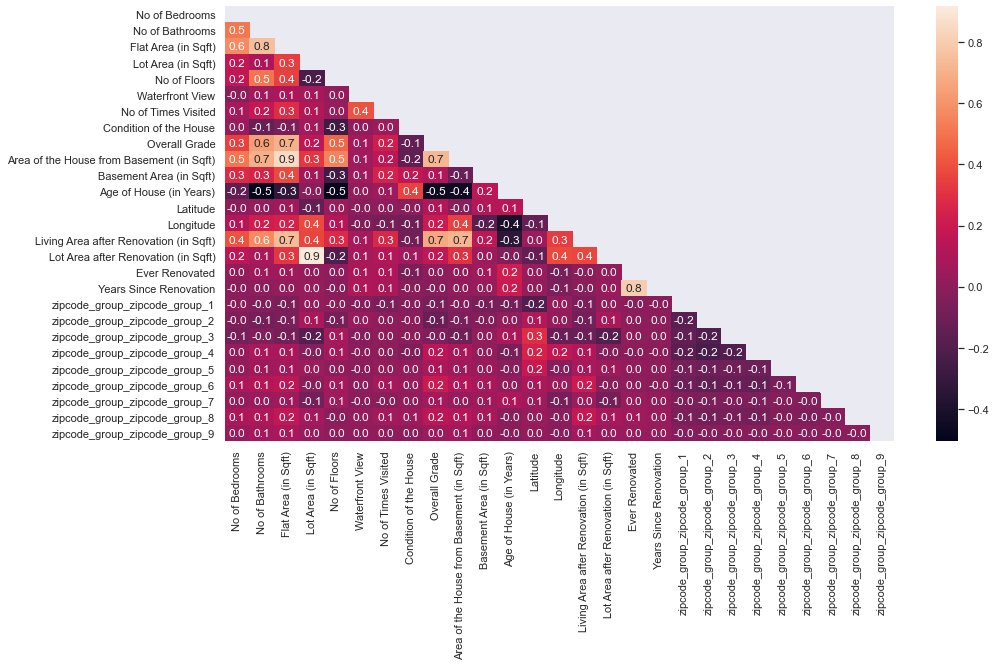

In [431]:
plt.figure(figsize = (15,8))
sns.heatmap(X.corr(), annot = True, fmt = '.1f', mask = np.triu(np.ones_like(X.corr())));

In [425]:
#pair of independent variables with correlation greater than 0.5, 
# which we will consider as having high positive correlation

k = X.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

As you can see here, we have 34 pairs of variables with high correlation amongst themselves. Half of them are duplicates since our formula counted i, j and j, i.

Whenever, we encounter two variables that are highly correlated, we must remove one of the variables. But which variable do we remove? To determine this we will calculate the VIF of our independent variables. The interpretation is, higher the VIF value associated with an Independent Variable, more correlated this variable is, with the other Independent Variables in our dataset and hence the Independent Variable can be removed.

Note: While a lower value of VIF is preferred, the threshold in general is taken as 5. i.e only variables with VIF > 5 need to be removed.

In [438]:
#calculating the VIF value associated with our independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])],
                index = vif_data.columns)

VIF.sort_values(ascending = False)

Area of the House from Basement (in Sqft)    23.547182
Flat Area (in Sqft)                          21.769570
Lot Area (in Sqft)                            6.885744
Lot Area after Renovation (in Sqft)           6.643101
Basement Area (in Sqft)                       6.634131
No of Bathrooms                               3.434533
zipcode_group_zipcode_group_4                 3.250052
Overall Grade                                 3.101478
Ever Renovated                                3.029876
Living Area after Renovation (in Sqft)        2.997525
Years Since Renovation                        2.874180
zipcode_group_zipcode_group_3                 2.863789
Age of House (in Years)                       2.624234
zipcode_group_zipcode_group_2                 2.566903
Latitude                                      2.457987
No of Floors                                  2.435679
zipcode_group_zipcode_group_6                 2.054672
Longitude                                     1.814729
No of Bedr

Now, we can see that only 7 variables have a VIF of greater than 5, even though when we computed correlation, we got 16 pairs of independent variables with correlation greater than 0.5

This is because, correlation is computed for pairs of variables. Meanwhile, VIF is computed for each Independent Variable w.r.t all other Independent Variables.

#### Note: We do not need to remove all the above 7 variables, even though their VIF values are above 5. This is because, removing even one variable with a VIF greater than 5 can possibly reduces the VIF of all other variables. So, in order to remove Multicollinearity, while only removing as few variables as possible, we need to follow an iterative approach where we only remove the variable with the higest VIF value during each iteration.

In [441]:
#defining a function to remove only the independent variable with highest VIF.
def mc_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])],
                    index = data.columns)
    
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0], ' has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No more multicollinearity is present')
        return data

Since we found 7 variables with VIF value above 5, we will run the above function 7 times, on 'vif_data'!

In [442]:
for i in range(7):
    vif_data = mc_remover(vif_data)
vif_data.head()

Area of the House from Basement (in Sqft)  has been removed
Lot Area (in Sqft)  has been removed
Flat Area (in Sqft)  has been removed
No more multicollinearity is present
No more multicollinearity is present
No more multicollinearity is present
No more multicollinearity is present


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Latitude,...,Years Since Renovation,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.726332,0.544734,-0.352576,...,-0.168911,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.538457,0.680915,1.161645,...,4.827106,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-0.726332,1.293731,1.283619,...,-0.168911,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,1.504500,0.204281,-0.283288,...,-0.168911,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,-0.726332,-0.544715,0.409587,...,-0.168911,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [443]:
#computing the VIF values for the remaining variables

VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])],
                index = vif_data.columns)

VIF.sort_values(ascending = False), len(VIF)

(zipcode_group_zipcode_group_4             3.232047
 Ever Renovated                            3.024617
 No of Bathrooms                           2.960501
 Years Since Renovation                    2.871019
 zipcode_group_zipcode_group_3             2.851134
 Overall Grade                             2.696057
 Living Area after Renovation (in Sqft)    2.570480
 zipcode_group_zipcode_group_2             2.563340
 Age of House (in Years)                   2.537683
 Latitude                                  2.456676
 No of Floors                              2.224729
 zipcode_group_zipcode_group_6             2.035762
 Longitude                                 1.776347
 zipcode_group_zipcode_group_5             1.727052
 Basement Area (in Sqft)                   1.649808
 Lot Area after Renovation (in Sqft)       1.646210
 zipcode_group_zipcode_group_1             1.538124
 No of Bedrooms                            1.510081
 No of Times Visited                       1.411317
 zipcode_gro

As you can see, none of the remaining variables have VIF value greater than 5!!

# Train / Test Split

In [447]:
X = vif_data #dataframe containing independent variables             
Y = data['Sale Price'] #Series Object containing the Target variable

In [465]:
#spliting the data into train dataset and test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape #validating the dimensions of the split

((15126, 24), (6483, 24), (15126,), (6483,))

# Linear Regression Model

In [476]:
#to see all parameters of the model
from sklearn import set_config
set_config(print_changed_only = False)

In [568]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize = True)#normalizing all independent variables so that we dont need to worry about y-intercept
lr.fit(x_train, y_train) #fitting/training the model on the train dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True,
                 positive=False)

In [467]:
predictions = lr.predict(x_test)
score = lr.score(x_test, y_test)
print('The score of our Linear Regression Model is {:.4f}'.format(score))

The score of our Linear Regression Model is 0.8221


# The Linear Regression Model is giving an R-Squared value of 0.8221

In [590]:
pd.set_option('float_format', '{:.0f}'.format)
model_output = pd.DataFrame({'Actual Sale Price': y_test,
                            'Predicted Sale Price': lr.predict(x_test)})

print('Random Sample of 20 Predictions of the Linear Regression Model on the Test Dataset')
model_output.sample(n = 20)

Random Sample of 20 Predictions of the Linear Regression Model on the Test Dataset


,Actual Sale Price,Predicted Sale Price
5639,100000,64821
566,260000,174209
835,324500,287625
9707,229950,267787
12515,760250,859584
20328,389950,323394
5239,292600,336114
14460,346000,387201
1067,250000,298151
6450,449950,461606
